<a href="https://colab.research.google.com/github/Bsrinadh18/CODSOFT/blob/main/Task_03(customer_churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:

data = pd.get_dummies(data, columns=['Geography','Gender'])


                                               Dropping the coloums

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


                                          Changing categoric to numeric

In [ ]:
data = pd.get_dummies(data,drop_first = True)
data.head()
data = data.astype(int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,1,0,0,1,0
9998,772,42,3,75075,2,1,0,92888,1,0,1,0,0,1


                                          Data visualization
                                          #Representing the data

In [ ]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

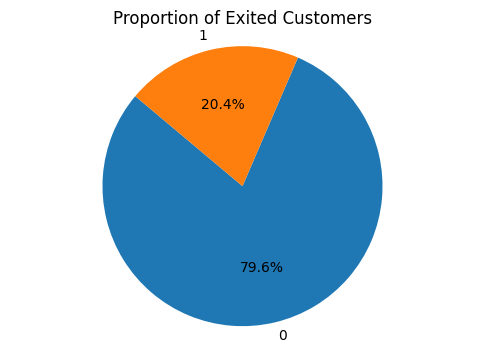

In [ ]:
exit_counts = data['Exited'].value_counts()

# Pie chart
plt.figure(figsize=(6, 4))
plt.pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Exited Customers')
plt.show()

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 13)
Testing Shape:  (1000, 13)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.57700814,
        -0.91105005,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.57700814,
         1.09763453, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ...,  1.73307782,
        -0.91105005,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.57700814,
         1.09763453, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.57700814,
        -0.91105005,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ..., -0.57700814,
        -0.91105005,  0.91105005]])

                           Implementing logistic regression

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.809


In [ ]:
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
svm.fit(X_train_scaled, y_train_classified)

SVC()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.863


                          Implementing Random forest

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [ ]:
test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.866


                           Implementing Decision tree classifier

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.805


                              Implementing KNeighbors classifier

In [ ]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.84


                        Implementing GradientBoosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [ ]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.867


In [ ]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.809
1,svm,0.863
2,KNN,0.866
3,dt,0.805
4,rf,0.840
5,GBC,0.867
